In [2]:
# ozone.zip
# 종속변수(target) : Ozone(오존량)
#     오존량은 linear regression이다.
# 독립변수(feature) : Solar.R(태양광), Wind(바람), Temp(온도), Month(월), Day(일)

# 온도에 따른 오존량을 학습시켜 보자.

# 필요한 module 불러오기
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Raw Data Loading
df = pd.read_csv('./data/ozone.csv')
display(df.head())


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [3]:
# 데이터 전처리
#     결측치는 머신러닝에서 계산이 제대로 안 될 수 있다.
#     이러한 데이터들을 가공하는 것을 데이터 전처리라고 한다.
df = df[['Ozone', 'Temp']]
display(df.head())
df = df.dropna(how='any') # how='any' : 모두 지우기
display(df.head(), df.shape) # (116, 2)


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
4,NaN,56


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66


(116, 2)

In [15]:
# Training Data Set

# feature : Temp
# target : Ozone
# 둘 다 2차원 ndarray 형태로 만들어야 한다.
x_data = df['Temp'].values.reshape(-1, 1)
t_data = df['Ozone'].values.reshape(-1, 1)

# Model
keras_model = Sequential()

# Layer
input_layer = Flatten(input_shape=(1,))
output_layer = Dense(1, activation='linear')
#     activation : b를 더한 뒤 취해야할 행동
#     activation='linear' : 아무런 행동도 하지 않고 그대로 출력하기

# Model에 layer를 추가
keras_model.add(input_layer)
keras_model.add(output_layer)

# Model 설정
keras_model.compile(optimizer=SGD(learning_rate=1e-4), loss='mse') # 1e-4 : 10^(-4)

# Model 학습
keras_model.fit(x_data,
               t_data,
               epochs=2000,
               verbose=0)
#     verbose=0 : 학습 내용 출력 안 함
#     출력 : <keras.callbacks.History at 0x1d52dff1ee0>


In [14]:
# 학습이 끝났으면 모델 평가가 이루어져야 한다.
# 우리가 아직 평가를 할 줄 몰라!
# 일단 그냥 넘어가자!


In [17]:
# 평가가 잘 이루어졌다고 치고!
# 모델이 잘 만들어졌으면 예측해보아요!
result = keras_model.predict([[62]]) # 화씨 62인 경우 오존량은 얼마인가요?
print(result)
# 출력
#     1/1 [==============================] - 0s 28ms/step
#     [[38.20054]]

# 결과가 나오긴 했는데, 정답인지 아닌지 알 수가 없다.


1/1 [==============================] - 0s 28ms/step
[[38.20054]]


[[3.58411393]]


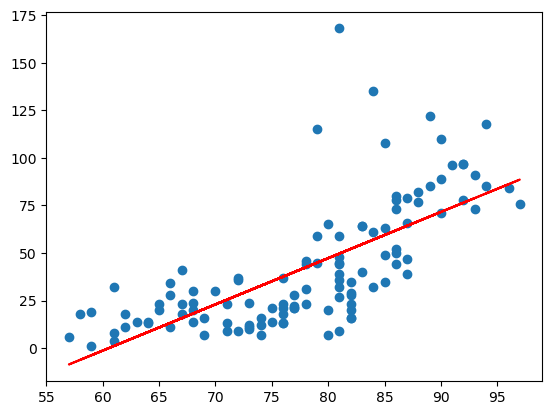

In [21]:
# 그래서... 잘 만들어진 라이브러리를 이용해서 정답에 가까운 값을 알아볼 거예요.
# 우리 모델과 비교해보자
# sklearn 설치
from sklearn import linear_model
# 설치 안 되어 있으면 아래 명령어로 설치
#     conda activate data_env
#     conda install scikit-learn

# x_data, t_data는 이미 가지고 있다.

# model을 만들어보자
sklearn_model = linear_model.LinearRegression()

# 학습 진행
sklearn_model.fit(x_data, t_data)

# 예측
result_sklearn = sklearn_model.predict([[62]])
print(result_sklearn)

# 눈으로 확인해보자. 산점도(scatter)와 직선(model) 그리기
plt.scatter(x_data, t_data) # 산점도

weight = sklearn_model.coef_ # coef_ : 모델이 가지고 있는 w값
bias = sklearn_model.intercept_ # intercept_ :

# plt.plot(x_data, x_data * weight + bias) # 직선 그리기
plt.plot(x_data, x_data * weight + bias, color = 'r') # 직선 그리기

plt.show()


1/1 [==============================] - 0s 42ms/step
[[38.20054]]


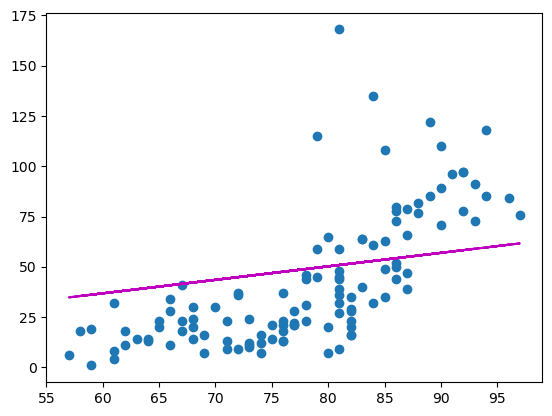

In [25]:
# 이제 scikit-learn 데이터 말고, 우리가 예측했던 모델을 확인해보자.

result = keras_model.predict([[62]]) # 화씨 62인 경우 오존량은 얼마인가요?
print(result)
# 출력
#     1/1 [==============================] - 0s 28ms/step
#     [[38.20054]]

x_data = df['Temp'].values.reshape(-1, 1)
t_data = df['Ozone'].values.reshape(-1, 1)
plt.scatter(x_data, t_data)
weight, bias = output_layer.get_weights()
plt.plot(x_data, x_data * weight + bias, color = 'm')
plt.show()

# 어떻게 보면, 얼추 된 것 같아보이는 직선이다.
# 그런데 scikit-learn때와는 달리 활씬 결과물이 안 좋은 상황이다.
# 그렇다면 이상한 결과를 얻은 이유. 왜 그럴까?


In [27]:
# 제대로 된 결과를 얻지 못한 이유
#     데이터를 잘못 넣은 거다.
#     데이터의 전처리가 제대로 이뤄지지 않은 것.
#     우리의 모델이 잘못된 게 아닌 거지.
# sklearn은 알아서 데이터처리까지 다 했기때문에 결과가 잘 나오는 것.

# 우리가 기억해야 하는 데이터의 전처리 과정 3가지
#     (원래는 더 많고, 수학적으로 접근해야 한다.)
# 1. 결측치 처리
#     이건 했다. 냅다 삭제해버렸음.
# 2. 이상치 처리
#     이건 아직 안 했다. 그런데 이걸 잘 챙기려면 시간이 한참 걸린다.
#     그리고 우리들의 데이터가 잘못된 이유 중 큰 영향을 끼치지는 않았기 때문.(이상치가 하나 뿐이니까)
# 3. 정규화(Normalization)
#     데이터는 반드시 정규화시켜야 한다.
#     feature마다 scale이 다르기 때문.
#         ex. 아파트의 가격에 영향을 크게 미치는 건 연식이 아니라 방의 개수, 크기이다.
#         그런데 연식은 숫자의 범위가 커도 영향이 작고, 방은 숫자의 범위가 작은데 영향이 큰 것.
#     min-max scaling을 이용하자. 최댓값 1, 최솟값 0 사이의 값으로 값을 변환하자.


In [29]:
# 위 코드 그대로 가져와서 다시 해보자

# Training Data Set

# feature : Temp
# target : Ozone
# 둘 다 2차원 ndarray 형태로 만들어야 한다.
x_data = df['Temp'].values.reshape(-1, 1)
t_data = df['Ozone'].values.reshape(-1, 1)

# 데이터 전처리
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_x.fit(x_data) # scaler_x에게 x데이터가 가지고 있는 최대 최소값을 아려준다.
x_data_norm = scaler_x.transform(x_data)# 원래 데이터에서 최대 최소값을 가지고서 정규화
scaler_t = MinMaxScaler()
scaler_t.fit(t_data) # scaler_t에게 t데이터가 가지고 있는 최대 최소값을 아려준다.
t_data_norm = scaler_t.transform(t_data)# 원래 데이터에서 최대 최소값을 가지고서 정규화


# Model
keras_model = Sequential()

# Layer
input_layer = Flatten(input_shape=(1,))
output_layer = Dense(1, activation='linear')
#     activation : b를 더한 뒤 취해야할 행동
#     activation='linear' : 아무런 행동도 하지 않고 그대로 출력하기

# Model에 layer를 추가
keras_model.add(input_layer)
keras_model.add(output_layer)

# Model 설정
keras_model.compile(optimizer=SGD(learning_rate=1e-4), loss='mse') # 1e-4 : 10^(-4)

# Model 학습
keras_model.fit(x_data_norm,
               t_data_norm,
               epochs=2000,
               verbose=0)
#     verbose=0 : 학습 내용 출력 안 함
#     출력 : <keras.callbacks.History at 0x147a498de80>


1/1 [==============================] - 0s 26ms/step
[[48.486176]]
1/1 [==============================] - 0s 15ms/step
[[-0.04164609]]
[[21.875]]


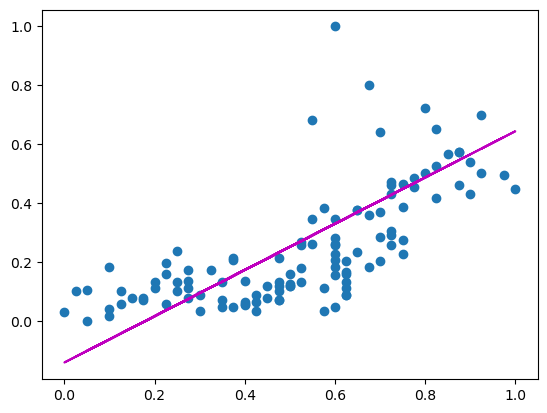

In [38]:
# 이제 그래프를 그려보자

# 기존 결과값
result = keras_model.predict([[62]]) # 화씨 62인 경우 오존량은 얼마인가요?
print(result)
# 출력
#     1/1 [==============================] - 0s 26ms/step
#     [[38.20054]] -> [[48.486176]]

# 예측값도 스케일링하자
scaled_data = scaler_x.transform([[62]])
result = keras_model.predict(scaled_data) # 화씨 62인 경우 오존량은 얼마인가요?
print(result)
# 출력
#     1/1 [==============================] - 0s 15ms/step
#     [[-0.04164609]]
#     [[-0.04164609]] 이 값은 오존값이긴 한데, scaling 되어 있는 값이다.
#     따라서 원복시켜야 한다.
real_result = scaler_t.inverse_transform(scaled_data)
print(real_result)
# 출력 : [[21.875]]

plt.scatter(x_data_norm, t_data_norm)
weight, bias = output_layer.get_weights()
plt.plot(x_data_norm, x_data_norm * weight + bias, color = 'm')
plt.show()
